#### Student Name: Cagri Aslanbas
# Project: Investigation of TMDb Movie Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This Jupyter Notebook document explores The Movie Database (TMDb) data set. It scrutinizes the correlation between movies' vote averages and other factors between each other such as its genre, revenue etc.
>
> Vote average variable of the movies will be the dependent variable and genres, revenue and release years will be the indepentent variables of this study.
>
> NOTE: We will use revenue_adj column for our studies as this variable is in terms of 2010 dollars, accounting for inflation over time, which is more comparable.

In [1]:
# import the libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will have a look at the raw TMDb data and shape it into a form such that it will have the relevant data that will be needed in our analysis only.
>
> Colunms that won't be used will be trimmed in this section.

### General Properties:

In [2]:
# read the TMDb csv file
df = pd.read_csv("tmdb-movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Trimming columns that will not be used:

> This study will get use of columns vote_average (dependant variable), revenue_adj, release_year and genres (independent variables) for exploration. We will also need the original_title, id and vote_count columns for clear identification of the movies.
>
> Therefore, other columns will be dropped before data cleaning.

In [3]:
# dropping redundant columns
df.drop(['popularity', 'budget', 'revenue', 'runtime', 'budget_adj', 'director', 'cast', 'keywords', 'release_date', 'homepage', 'imdb_id', 'tagline', 'overview', 'production_companies'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
revenue_adj       10866 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 594.3+ KB


> We can see that there are 10866 rows. Except genres column, none of the columns have null values. We need to drop the rows that has null genres value as we cannot replace null genres values with something else (it is not a measurable variable).

In [4]:
# drop rows with null values
df.dropna(how='any', axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 7 columns):
id                10843 non-null int64
original_title    10843 non-null object
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
revenue_adj       10843 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 677.7+ KB


<a id='cleaning'></a>
## Cleaning

> In this section, we will clean the cells that are null or zero and also irreplaceable. 
>
>  In the end, we will make sure we have meaningful data in each movie entry.

In [5]:
df.describe()

,id,vote_count,vote_average,release_year,revenue_adj
count,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04
mean,65868.491930,217.813705,5.973974,2001.315595,5.147332e+07
std,91977.394803,576.155351,0.934260,12.813298,1.447664e+08
min,5.000000,10.000000,1.500000,1960.000000,0.000000e+00
25%,10589.500000,17.000000,5.400000,1995.000000,0.000000e+00
50%,20558.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,75182.000000,146.000000,6.600000,2011.000000,3.387655e+07
max,417859.000000,9767.000000,9.200000,2015.000000,2.827124e+09


> In order to make a fair analysis, movies that have low number of vote_counts need to be eliminated. In the next step, I will dig deep into the vote_count column and drop some movies that have vote counts under a certain threshold. To do that lets start with the histogram of the vote_counts (<a href="https://stackoverflow.com/a/47036802/4665915">Stackoverflow source</a>):

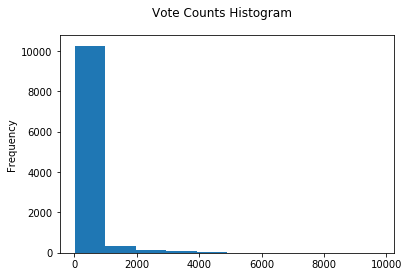

In [6]:
df['vote_count'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Vote Counts Histogram');

> Let's split the movies into two groups: movies that has total vote count under the mean value (which is 217) and over the mean value. And see both of these data frames correlation to the vote_average.

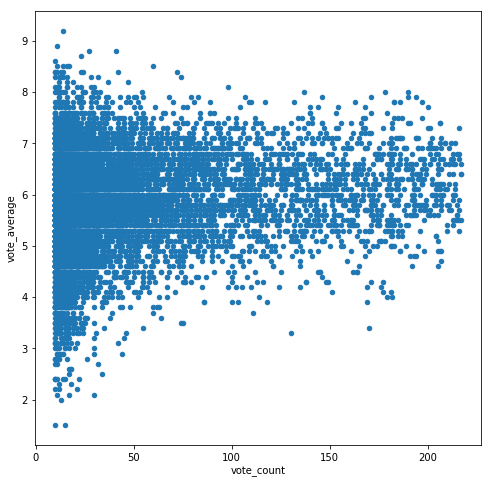

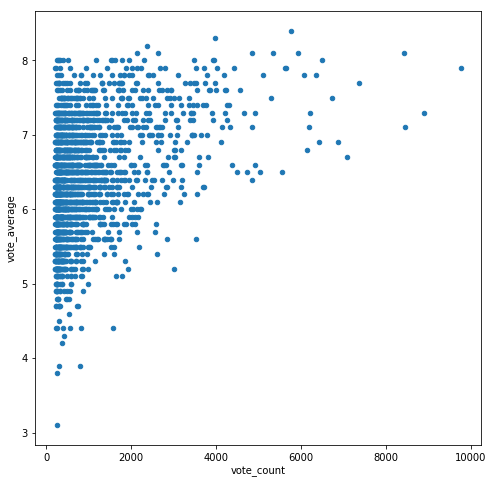

In [7]:
df_low_vote_counts = df.query('vote_count <= 217');
df_high_vote_counts = df.query('vote_count > 217');
df_low_vote_counts.plot(x = 'vote_count', y = 'vote_average', kind='scatter', figsize=(8,8));
df_high_vote_counts.plot(x = 'vote_count', y = 'vote_average', kind='scatter', figsize=(8,8));

> When these two graphs are compared, it's obvious that the vote average of movies having vote counts less than 25-30 do not have a meaningful pattern as low vote counts can shape the vote average dramatically. Therefore we can drop the movies with vote counts less than 30.

In [8]:
df = df.query('vote_count >= 30')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6142 entries, 0 to 10848
Data columns (total 7 columns):
id                6142 non-null int64
original_title    6142 non-null object
genres            6142 non-null object
vote_count        6142 non-null int64
vote_average      6142 non-null float64
release_year      6142 non-null int64
revenue_adj       6142 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 383.9+ KB


In [9]:
# lets see the first 10 rows
df.head(10)

,id,original_title,genres,vote_count,vote_average,release_year,revenue_adj
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.392446e+09
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,3.481613e+08
2,262500,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,2.716190e+08
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.902723e+09
4,168259,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.385749e+09
5,281957,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,4.903142e+08
6,87101,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,4.053551e+08
7,286217,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015,5.477497e+08
8,211672,Minions,Family|Animation|Adventure|Comedy,2893,6.5,2015,1.064192e+09
9,150540,Inside Out,Comedy|Animation|Family,3935,8.0,2015,7.854116e+08


> Finally, we need to drop the duplicate values if any.

In [10]:
sum(df.duplicated())

1

In [11]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis

#### In this section, we will try to find answers to two questions:
<ol>
  <li>Which genres has the highest average of votes from year to year in 2000s?</li>
  <li>Is there any relation between the movies' vote average and revenue in terms of 2010 dollars?</li>
</ol>

##### 1. Which genres has the highest average of votes from year to year in 2000s?

> This question requires a multiple-variable (2d) exploration, which consists of a correlation between our dependant variable vote_average and two independant variables release_year and genres.

In [12]:
df.head(10)

,id,original_title,genres,vote_count,vote_average,release_year,revenue_adj
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.392446e+09
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,3.481613e+08
2,262500,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,2.716190e+08
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.902723e+09
4,168259,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.385749e+09
5,281957,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,4.903142e+08
6,87101,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,4.053551e+08
7,286217,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015,5.477497e+08
8,211672,Minions,Family|Animation|Adventure|Comedy,2893,6.5,2015,1.064192e+09
9,150540,Inside Out,Comedy|Animation|Family,3935,8.0,2015,7.854116e+08


> Movies mostly have more than one genres splitted with the pipe delimiter "|" character. We need to create duplicates of each movie by the number of genre type it has. Then split the genres and spread them into each duplicate movie it belongs.
>
> For example for the movie "Jurassic World" (id:135397), it has 4 genres, namely "Action|Adventure|Science Fiction|Thriller". We need to create 4 duplicates of "Jurassic Park" and assign Action, Adventure, Science Fiction and Thriller to each of its genre, separately.
>
> Let's see how many movies have multiple genres:

In [13]:
# see how many movies have multiple genres
multiple_genres = df[df['genres'].str.contains("\|")]
print(multiple_genres.shape);
print(df.shape);

(5052, 7)
(6141, 7)


> Okay, 4169 of our total 5035 movies have multiple genres. Another tricky part is that the number of genre types for each movie is not static, it differs from one movie to another.
>
> Since the number of genres each movie has is dynamic, I have searched a way to do it from Stackoverflow and found a function that solves this problem (<a href="https://stackoverflow.com/a/39946744/4665915">Stackoverflow source</a>):

In [14]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

> Firstly, I created a copy of our dataframe, named df_genres_ops. By using tidy_split function I did split each genre and assign to its corresponding duplicate movie row, named the result as multiple_genres_separated. 
>
> Then I dropped the movies with multiple genres from the original copy df_genres_ops.
>
> Finally, I merged two dataframes, df_genres_ops and multiple_genres_separated.
> (<a href="https://classroom.udacity.com/nanodegrees/nd002/parts/16904efb-1891-4822-ac1b-e6d74d746872/modules/cfb63a6e-56a3-4022-9d61-514f2f4759a8/lessons/f81a3576-0665-4721-a8bb-ba50c80c04ac/concepts/1c0a837e-0cbd-4d48-8acf-9aa0b80aa252">Udacity source</a>)

In [15]:
df_genres_ops = df.copy()
multiple_genres_separated = tidy_split(multiple_genres, 'genres', sep='|')
df_genres_ops.drop(multiple_genres.index, inplace=True)
df_genres_ops = df_genres_ops.append(multiple_genres_separated, ignore_index=True)
print(df_genres_ops.shape)
df_genres_ops.tail(10)

(16102, 7)


,id,original_title,genres,vote_count,vote_average,release_year,revenue_adj
16092,5780,Torn Curtain,Thriller,46,6.3,1966,8.733419e+07
16093,6644,El Dorado,Action,36,6.9,1966,4.030809e+07
16094,6644,El Dorado,Western,36,6.9,1966,4.030809e+07
16095,3001,How to Steal a Million,Comedy,67,7.3,1966,0.000000e+00
16096,3001,How to Steal a Million,Crime,67,7.3,1966,0.000000e+00
16097,3001,How to Steal a Million,Romance,67,7.3,1966,0.000000e+00
16098,13353,"It's the Great Pumpkin, Charlie Brown",Family,49,7.2,1966,0.000000e+00
16099,13353,"It's the Great Pumpkin, Charlie Brown",Animation,49,7.2,1966,0.000000e+00
16100,2161,Fantastic Voyage,Adventure,42,6.7,1966,8.061618e+07
16101,2161,Fantastic Voyage,Science Fiction,42,6.7,1966,8.061618e+07


> As can be seen, the movies with multiple genres are splitted and each of its genre is assigned to one of these duplicates.

In [16]:
# guarantee that each genre is lowercase
df_genres_ops['genres'] = df_genres_ops['genres'].str.lower()
df_genres_ops.tail(10)

,id,original_title,genres,vote_count,vote_average,release_year,revenue_adj
16092,5780,Torn Curtain,thriller,46,6.3,1966,8.733419e+07
16093,6644,El Dorado,action,36,6.9,1966,4.030809e+07
16094,6644,El Dorado,western,36,6.9,1966,4.030809e+07
16095,3001,How to Steal a Million,comedy,67,7.3,1966,0.000000e+00
16096,3001,How to Steal a Million,crime,67,7.3,1966,0.000000e+00
16097,3001,How to Steal a Million,romance,67,7.3,1966,0.000000e+00
16098,13353,"It's the Great Pumpkin, Charlie Brown",family,49,7.2,1966,0.000000e+00
16099,13353,"It's the Great Pumpkin, Charlie Brown",animation,49,7.2,1966,0.000000e+00
16100,2161,Fantastic Voyage,adventure,42,6.7,1966,8.061618e+07
16101,2161,Fantastic Voyage,science fiction,42,6.7,1966,8.061618e+07


> First of all, as we will be looking for the movies in 2000s, I am going to filter df_genres_ops dataframe.

In [17]:
df_genres_ops = df_genres_ops.query('release_year >= 2000')
df_genres_ops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 0 to 13536
Data columns (total 7 columns):
id                10775 non-null int64
original_title    10775 non-null object
genres            10775 non-null object
vote_count        10775 non-null int64
vote_average      10775 non-null float64
release_year      10775 non-null int64
revenue_adj       10775 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 673.4+ KB


In [18]:
df_genres_ops.describe()

,id,vote_count,vote_average,release_year,revenue_adj
count,10775.000000,10775.000000,10775.000000,10775.000000,1.077500e+04
mean,74805.437123,476.551647,6.056659,2008.605568,8.844555e+07
std,95307.393343,881.597262,0.816939,4.422063,1.849791e+08
min,12.000000,30.000000,2.100000,2000.000000,0.000000e+00
25%,10051.000000,59.000000,5.500000,2005.000000,0.000000e+00
50%,23082.000000,148.000000,6.100000,2009.000000,1.119823e+07
75%,102839.500000,453.000000,6.600000,2012.000000,9.268990e+07
max,417859.000000,9767.000000,8.800000,2015.000000,2.827124e+09


> Okay, the minimum release_year is 2000.
>
> Now, we will groupby the movies with their mean vote_average by 2 variables: release_year and genres, respectively:

In [19]:
df_genres_ops.groupby(["release_year", "genres"])["vote_average"].mean()

release_year  genres         
2000          action             5.902857
              adventure          6.087500
              animation          6.252941
              comedy             5.934483
              crime              6.090909
              drama              6.256667
              family             6.004167
              fantasy            5.829412
              foreign            6.400000
              history            6.250000
              horror             5.600000
              music              7.160000
              mystery            5.836364
              romance            5.744000
              science fiction    5.470588
              thriller           5.860000
              war                6.250000
              western            6.100000
2001          action             5.788636
              adventure          5.688462
              animation          6.200000
              comedy             5.706250
              crime              6.135294
    

> This is what we needed.
>
> Now there is a tricky part. I need to filter the max vote_average mean from each year group. To do that I need to convert this pandas.GroupBy object to a dataframe first (<a href="https://stackoverflow.com/a/46938596/4665915">Stackoverflow source</a>):

In [20]:
df_grouped_mean = df_genres_ops.groupby(["release_year", "genres"])["vote_average"].mean().reset_index()
df_grouped_mean.head()

,release_year,genres,vote_average
0,2000,action,5.902857
1,2000,adventure,6.087500
2,2000,animation,6.252941
3,2000,comedy,5.934483
4,2000,crime,6.090909


> In the next step, I re-groupby this new dataframe called df_grouped_mean with its max vote_average by release_date column:

In [21]:
df_grouped_mean_max = df_grouped_mean.groupby("release_year")["vote_average"].max().reset_index()
df_grouped_mean_max.head()

,release_year,vote_average
0,2000,7.160000
1,2001,6.675000
2,2002,7.100000
3,2003,7.333333
4,2004,6.600000


> We have only last thing to do: Intersect (similar as inner join) df_grouped_mean and df_grouped_mean_max so that we get the genre names of df_grouped_mean_max entries (<a href="https://stackoverflow.com/a/26921975/4665915">Stackoverflow source</a>):

In [22]:
df_grouped_genres_vote_year = pd.merge(df_grouped_mean, df_grouped_mean_max, how='inner', on=["release_year", "vote_average"])
df_grouped_genres_vote_year

,release_year,genres,vote_average
0,2000,music,7.160000
1,2001,war,6.675000
2,2002,documentary,7.100000
3,2002,western,7.100000
4,2003,documentary,7.333333
5,2004,foreign,6.600000
6,2005,documentary,6.966667
7,2006,documentary,6.600000
8,2007,documentary,6.944444
9,2008,documentary,7.400000


> OK, thats it! We just need to plot this.

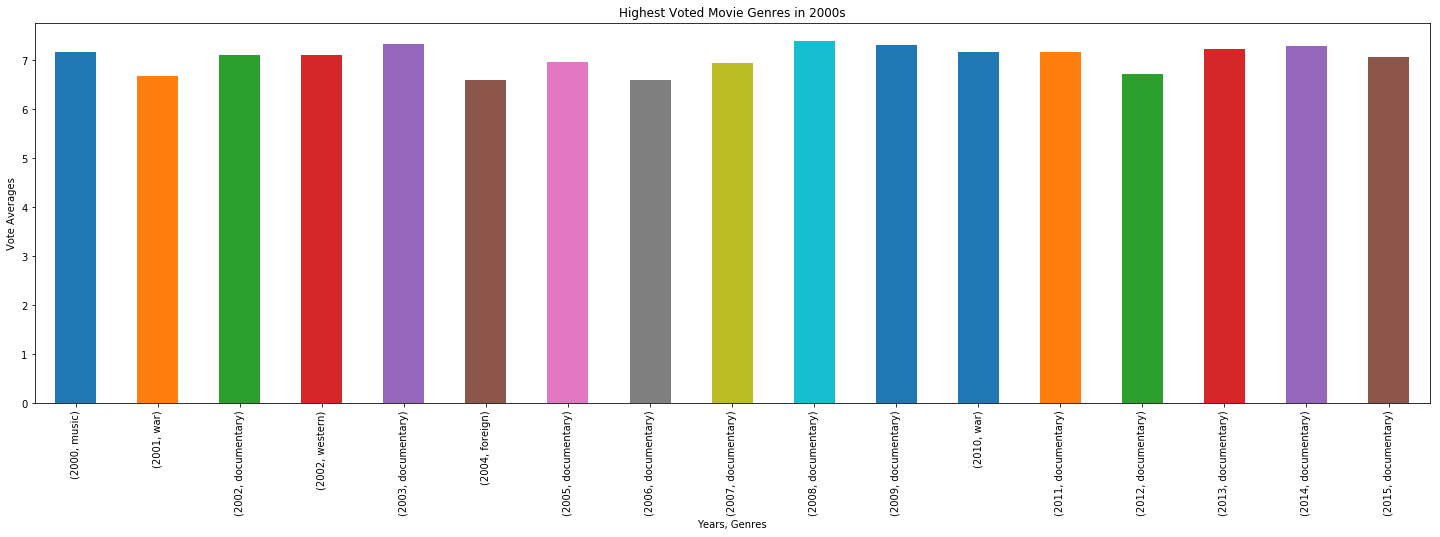

In [23]:
votes = df_grouped_genres_vote_year.groupby(["release_year", "genres"])['vote_average'].mean()
ax = votes.plot(kind='bar', figsize=(25,7));

ax.set_ylabel("Vote Averages")
ax.set_xlabel("Years, Genres")
ax.set_title('Highest Voted Movie Genres in 2000s');

> We can see that "documentary" genre leaded most of the years in 2000s, in terms of the mean vote average.

##### 2. Is there any relation between the movies' vote average and revenue in terms of 2010 dollars?

> To answer this question, we need to group revenue_adj values to certain thresholds and see the trends. Lets see some details.

In [24]:
df.describe()

,id,vote_count,vote_average,release_year,revenue_adj
count,6141.000000,6141.000000,6141.000000,6141.000000,6.141000e+03
mean,59429.219508,371.784074,6.152288,2002.322912,8.836860e+07
std,89054.082499,729.015102,0.818101,11.689026,1.833586e+08
min,5.000000,30.000000,2.100000,1960.000000,0.000000e+00
25%,9255.000000,53.000000,5.600000,1996.000000,0.000000e+00
50%,13192.000000,116.000000,6.200000,2006.000000,1.702528e+07
75%,71679.000000,333.000000,6.700000,2011.000000,9.436387e+07
max,417859.000000,9767.000000,8.800000,2015.000000,2.827124e+09


> It's pretty clear that at least half (50% percentile) of the movie rows' revenue_adj values are equal to zero (0.0). In order to make healthy analysis, we need rows with non-zero revenue_adj values. Therefore I will filter those with query function of pandas.

In [25]:
# drop rows that have zero revenue_adj values
df = df.query('revenue_adj > 0.0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4061 entries, 0 to 10848
Data columns (total 7 columns):
id                4061 non-null int64
original_title    4061 non-null object
genres            4061 non-null object
vote_count        4061 non-null int64
vote_average      4061 non-null float64
release_year      4061 non-null int64
revenue_adj       4061 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 253.8+ KB


In [26]:
df.describe()

,id,vote_count,vote_average,release_year,revenue_adj
count,4061.000000,4061.000000,4061.000000,4061.000000,4.061000e+03
mean,45855.132480,517.425265,6.214824,2001.832061,1.336300e+08
std,75012.460414,857.978306,0.767044,11.271411,2.116479e+08
min,5.000000,30.000000,3.300000,1960.000000,2.370705e+00
25%,6278.000000,82.000000,5.700000,1996.000000,1.780568e+07
50%,11217.000000,203.000000,6.200000,2005.000000,6.151774e+07
75%,48289.000000,549.000000,6.700000,2011.000000,1.583088e+08
max,417859.000000,9767.000000,8.400000,2015.000000,2.827124e+09


> It's a good idea to split revenue_adj to 4 groups: 25% (very low), 50% (low), 75% (normal) and 100% (high), respectively (<a href="https://classroom.udacity.com/nanodegrees/nd002/parts/16904efb-1891-4822-ac1b-e6d74d746872/modules/cfb63a6e-56a3-4022-9d61-514f2f4759a8/lessons/77286f5a-b206-4807-aaa0-7ecfc690268e/concepts/988ab8a2-dd75-4b53-b1a4-628ff331f461">Udacity source</a>):

In [27]:
# split by percentiles
percentiles = df.describe().loc[:, 'revenue_adj'].tail(4)
first = df.query('revenue_adj < {}'.format(percentiles[0]))
second = df.query('revenue_adj < {} & revenue_adj >= {}'.format(percentiles[1], percentiles[0]))
third = df.query('revenue_adj < {} & revenue_adj >= {}'.format(percentiles[2], percentiles[1]))
fourth = df.query('revenue_adj >= {}'.format(percentiles[2]))

mean_quality_first = first['vote_average'].mean()
mean_quality_second = second['vote_average'].mean()
mean_quality_third = third['vote_average'].mean()
mean_quality_fourth = fourth['vote_average'].mean()
print(mean_quality_first)
print(mean_quality_second)
print(mean_quality_third)
print(mean_quality_fourth)

6.1199999999999966
6.085320197044329
6.2079802955665055
6.445767716535431


> We can now plot a chart to see the trend.

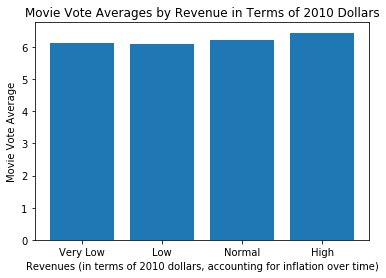

In [28]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = [mean_quality_first, mean_quality_second, mean_quality_third, mean_quality_fourth]
labels = ['Very Low', 'Low', 'Normal', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Movie Vote Averages by Revenue in Terms of 2010 Dollars')
plt.xlabel('Revenues (in terms of 2010 dollars, accounting for inflation over time)')
plt.ylabel('Movie Vote Average');

<a id='conclusions'></a>
## Conclusions

##### 1. Which genres has the highest average of votes from year to year in 2000s?

> We can see that in 2000s, "documentary" genre has the most vote_average count record by year to year, moreover, 12 times in 14 consecutive years (except 2004 and 2010). We can say that people vote higher points to documentary movies, when compared to movies with other genres.
>
> Another interesting point is that "music" genre came into prominence in year 2000, which has mean vote_average of 7.16.
>
> 10775 samples were included in this analysis, which is quite enough for single-genres movie-data since 2000. There were no significant missing values as the vote & genre related datas were all complete.
>
> Documentaries are types of movies where you need to perform a lot of research and show impressive effort. Of course the outcome of such productions pays that effort by having higher vote averages. Therefore this result was highly satisfactory.

##### 2. Is there any relation between the movies' vote average and revenue in terms of 2010 dollars?
> I tried to find a correlation between movie revenues in terms of 2010 dollars and its vote_average. Before making this exploration, my opinion was higher vote averages means higher revenues. I can say that I was right, because the highest vote_average mean belongs to the highest revenue percentile (after 75%), while the second one belongs to the second hisghest revenue percentile (after 50%).
>
> 4061 samples were included in this research, which is pretty low when compared to the sample set of the previous question. The main reason was that most of the movies in TMDb data had zero revenue_adj values. This caused an elimination of 2080 movie rows. But we can say that our analysis was pretty healthy as over 4000 samples is enough to give a clear image.